This data is taken from kaggle's Bike Sharing Competition (https://www.kaggle.com/c/bike-sharing-demand)
We are provided hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. The idea is to predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

##### Data Fields

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
holiday - whether the day is considered a holiday    
workingday - whether the day is neither a weekend nor holiday    
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy    
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    
temp - temperature in Celsius   
atemp - "feels like" temperature in Celsius    
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals 

##### Objective:  
I have just started my journey into the Python's Data Science world. The idea is to use this Bike sharing data set to try out different techniques & algorithms that I will pick up along the way. For testing my performance, I will use submission of results on test set to Kaggle so as to track my learning performance.

In [6]:
import pandas as pd

In [7]:
#Read train data
bikesharing = pd.read_csv('train.csv',index_col='datetime', parse_dates=True)
bikesharing.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
bikesharing.describe()
#no NA values

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
#dropping casual & registered columns as they add up to make count & the overall problem objective is to predict count
bikesharing.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
import seaborn as sns
%matplotlib inline

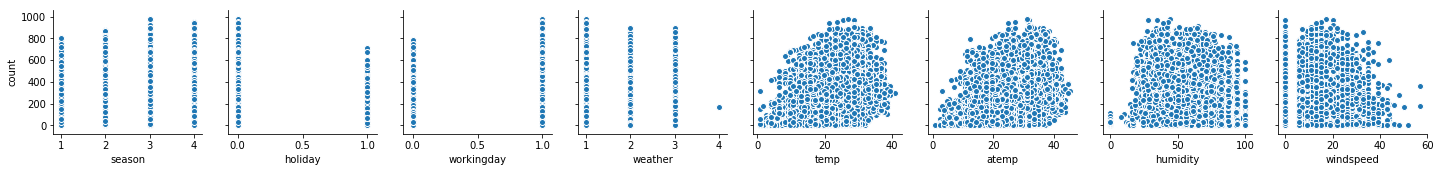

In [11]:
sns.pairplot(x_vars=bikesharing.loc[:,:'windspeed'].columns,y_vars='count',data=bikesharing)
#there are some positve or negative trends but relationships may not be linear & distribution is also spread out

In [12]:
import matplotlib.pyplot as plt

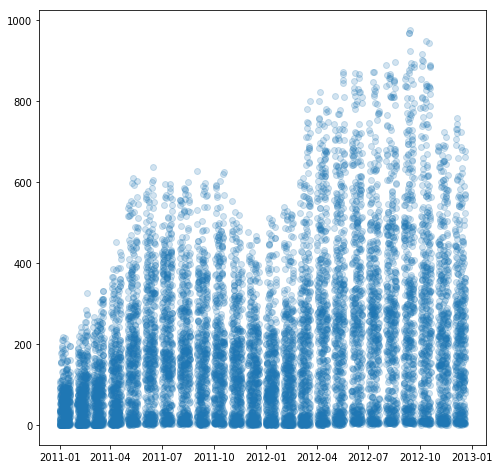

In [13]:
#Let us see the overall trend with respect to time
plt.figure(figsize=(8,8))
plt.plot_date(bikesharing.index,bikesharing['count'],alpha=0.2)
#The overall number seems to be increasing & follow similar trends in terms of relative numbers in each month

##### Linear Regression
I will now try to build a linear regression model on this dataset

In [14]:
#Importing package
from sklearn.linear_model import LinearRegression

In [15]:
#Create dummy variables for season
season_dummies = pd.get_dummies(bikesharing.season, prefix='season')
weather_dummies = pd.get_dummies(bikesharing.weather, prefix='weather')
#Drop last columns of the dummy variables as the information is already retained when the other three are zeroes
season_dummies.drop(season_dummies.columns[3],axis=1,inplace=True)
weather_dummies.drop(weather_dummies.columns[3],axis=1,inplace=True)

In [16]:
from datetime import datetime

In [17]:
#Extracting features from datetime
bikesharing['year']=bikesharing.index.year
bikesharing['month']=bikesharing.index.month
bikesharing['week']=bikesharing.index.strftime('%V')  #yearly week number starting from 1st Monday
bikesharing['hour']=bikesharing.index.hour
bikesharing['AmPm']=bikesharing.index.strftime('%p')

In [18]:
bikesharing.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,week,hour,AmPm
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,52,0,AM
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,52,1,AM
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,52,2,AM
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,52,3,AM
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,52,4,AM


In [19]:
#Creating Training Data
train = pd.concat([bikesharing,season_dummies,weather_dummies],axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,week,hour,AmPm,season_1,season_2,season_3,weather_1,weather_2,weather_3
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,52,0,AM,1,0,0,1,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,52,1,AM,1,0,0,1,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,52,2,AM,1,0,0,1,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,52,3,AM,1,0,0,1,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,52,4,AM,1,0,0,1,0,0


In [20]:
#Dropping season & weather variables as their dummy variables have already been added
train.drop(['season','weather'],axis=1,inplace=True)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,week,hour,AmPm,season_1,season_2,season_3,weather_1,weather_2,weather_3
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,2011,1,52,0,AM,1,0,0,1,0,0
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,2011,1,52,1,AM,1,0,0,1,0,0
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,2011,1,52,2,AM,1,0,0,1,0,0
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,2011,1,52,3,AM,1,0,0,1,0,0
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,2011,1,52,4,AM,1,0,0,1,0,0


In [21]:
train.columns[train.columns!='count']

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'week', 'hour', 'AmPm', 'season_1', 'season_2',
       'season_3', 'weather_1', 'weather_2', 'weather_3'],
      dtype='object')

In [22]:
#Converting AmPm to dummies
AmPm_dummies = pd.get_dummies(bikesharing.AmPm)
AmPm_dummies.head()

,AM,PM
datetime,,
2011-01-01 00:00:00,1,0
2011-01-01 01:00:00,1,0
2011-01-01 02:00:00,1,0
2011-01-01 03:00:00,1,0
2011-01-01 04:00:00,1,0


In [23]:
#add PM to train set & drop AmPm
train = pd.concat([train,AmPm_dummies['PM']],axis=1)
train.drop(['AmPm'],axis=1,inplace=True)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,week,hour,season_1,season_2,season_3,weather_1,weather_2,weather_3,PM
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,2011,1,52,0,1,0,0,1,0,0,0
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,2011,1,52,1,1,0,0,1,0,0,0
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,2011,1,52,2,1,0,0,1,0,0,0
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,2011,1,52,3,1,0,0,1,0,0,0
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,2011,1,52,4,1,0,0,1,0,0,0


In [24]:
feature_cols = train.columns[train.columns!='count']

In [25]:
#create test set
test = pd.read_csv('test.csv',index_col='datetime', parse_dates=True)

In [26]:
season_dummies_test = pd.get_dummies(test.season, prefix='season')
weather_dummies_test = pd.get_dummies(test.weather, prefix='weather')
#Drop last columns of the dummy variables as the information is already retained when the other three are zeroes
season_dummies_test.drop(season_dummies_test.columns[3],axis=1,inplace=True)
weather_dummies_test.drop(weather_dummies_test.columns[3],axis=1,inplace=True)

In [27]:
test = pd.concat([test,season_dummies_test,weather_dummies_test],axis=1)
test.drop(['season','weather'],axis=1,inplace=True)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3
datetime,,,,,,,,,,,,
2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,1,0,0
2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,1,0,0
2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,1,0,0
2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,1,0,0
2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,1,0,0


In [28]:
test['year']=test.index.year
test['month']=test.index.month
test['week']=test.index.strftime('%V')  #yearly week number starting from 1st Monday
test['hour']=test.index.hour
test['AmPm']=test.index.strftime('%p')
AmPm_dummies_test = pd.get_dummies(test.AmPm)
test = pd.concat([test,AmPm_dummies_test['PM']],axis=1)
test.drop(['AmPm'],axis=1,inplace=True)
test.tail()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,weather_3,year,month,week,hour,PM
datetime,,,,,,,,,,,,,,,,,
2012-12-31 19:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,0,1,0,2012,12,01,19,1
2012-12-31 20:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,0,1,0,2012,12,01,20,1
2012-12-31 21:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,1,0,0,2012,12,01,21,1
2012-12-31 22:00:00,0,1,10.66,13.635,56,8.9981,1,0,0,1,0,0,2012,12,01,22,1
2012-12-31 23:00:00,0,1,10.66,13.635,65,8.9981,1,0,0,1,0,0,2012,12,01,23,1


In [29]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import numpy as np

In [30]:
from sklearn.model_selection import train_test_split

#model building with recursive feature selection

# define a function that accepts number of features and returns testing RMSE
def train_test_rmse(features_to_select,train,feature_cols):
    X = train[feature_cols]
    y = train['count']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    estimator = LinearRegression()
    selector = RFE(estimator,n_features_to_select=features_to_select)
    selector = selector.fit(X_train, y_train)
    y_pred = selector.predict(X_test)
    return(np.sqrt(mean_squared_error(y_test, y_pred)))

In [31]:
rmse = pd.DataFrame({'N_features':np.arange(1,18)})
rmse.head()

,N_features
0,1
1,2
2,3
3,4
4,5


In [32]:
rmse['RMSE']=0.0

In [33]:
#Measuring validation set error
for i in rmse.N_features:
    print(i)
    rmse.RMSE[i-1]=train_test_rmse(i,train,feature_cols)

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


2
3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


4
5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


6
7


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


8
9


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


10
11


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


12
13
14


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


15
16
17


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [34]:
#Feature Selected
#train.columns[train.columns!='count'][selector.support_]

In [35]:
#Feature Ranking
#print(feature_cols)
#selector.ranking_

In [36]:
rmse[rmse.RMSE==min(rmse.RMSE)] #139.122589 with 17 features

,N_features,RMSE
16,17,139.122589


In [37]:
#not much of a difference in RMSE since 14 features
rmse

,N_features,RMSE
0,1,1.780367e+02
1,2,1.775726e+02
2,3,1.260378e+13
3,4,8.338865e+12
4,5,7.545042e+13
5,6,5.626854e+13
6,7,1.012451e+14
7,8,7.965590e+13
8,9,1.440041e+02
9,10,1.437533e+02


In [38]:
import re

Since weather is somehow already ordered in the sense as we move from levels 1 to 4 weather is becoming more severe. Let us try dropping dummy variables from weather & check if our original weather variable gave better results.

In [39]:
#extracting labels of dummy weather variables
lab=re.findall("weather_\d",str(train.columns))
#dropping dummy variables
train2=train.drop(lab,axis=1)
#add original weather variable
train2 = pd.concat([train2,bikesharing['weather']],axis=1)
train2.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,week,hour,season_1,season_2,season_3,PM,weather
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,2011,1,52,0,1,0,0,0,1
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,2011,1,52,1,1,0,0,0,1
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,2011,1,52,2,1,0,0,0,1
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,2011,1,52,3,1,0,0,0,1
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,2011,1,52,4,1,0,0,0,1


In [40]:
feature_cols2 = train2.columns[train2.columns!='count']
feature_cols2.nunique()

15

In [41]:
#initializing RMSE2 values with higher values
rmse['RMSE2']=1000.0

In [42]:
for i in np.arange(1,feature_cols2.nunique()+1):
    print(i)
    rmse.RMSE2[i-1]=train_test_rmse(i,train2,feature_cols2)

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2
3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5
6


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


7
8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


9
10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


11
12


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


13
14
15


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
rmse[rmse.RMSE2==min(rmse.RMSE2)] #139.333454 with all 15 variables
#Hence there is no difference weather we convert weather into a dummy variable or not

,N_features,RMSE,RMSE2
14,15,139.234368,139.333454


In [44]:
'''
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))'''

'\ndef rmsle(y, y0):\n    assert len(y) == len(y0)\n    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))'

In [45]:
#Generating prediction result on Kaggle's test set
X_train = train[feature_cols]
y_train = train['count']
X_test = test[feature_cols]
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=14)  #14 as there wasn't any significat gain after adding more features
selector = selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)

In [46]:
#Converting negative values to 0
for i in np.arange(0,len(y_pred)):
    if y_pred[i]<0:
        y_pred[i]=0

In [47]:
#Rounding up count prediction values
y_pred = y_pred.astype(int).round()

In [48]:
#so as to maintain order in final submission file
submission = pd.DataFrame(list(zip(test.index,y_pred)))

In [49]:
submission.rename(columns={0:'datetime',1:'count'},inplace=True)

In [50]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [51]:
#submission.to_csv('submission.csv',index=False)  #kaggle public score 1.33545 (Rank would have been 3019/3252)

In [52]:
#Let us revisit our model on train data
y_pred_train = selector.predict(X_train)

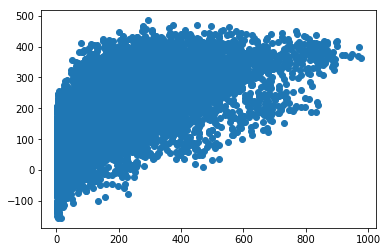

In [53]:
#Check Fitted vs Residual on train data
plt.scatter(y_train,y_pred_train)  #spread thorughout (not a good job in prediction)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


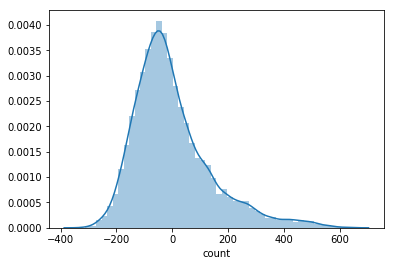

In [54]:
#Residual histogram
sns.distplot((y_train-y_pred_train))  #skewed towards left

Let us examine the features that were selected

In [55]:
feature_cols[selector.support_]

Index(['holiday', 'temp', 'atemp', 'humidity', 'year', 'month', 'hour',
       'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2',
       'weather_3', 'PM'],
      dtype='object')

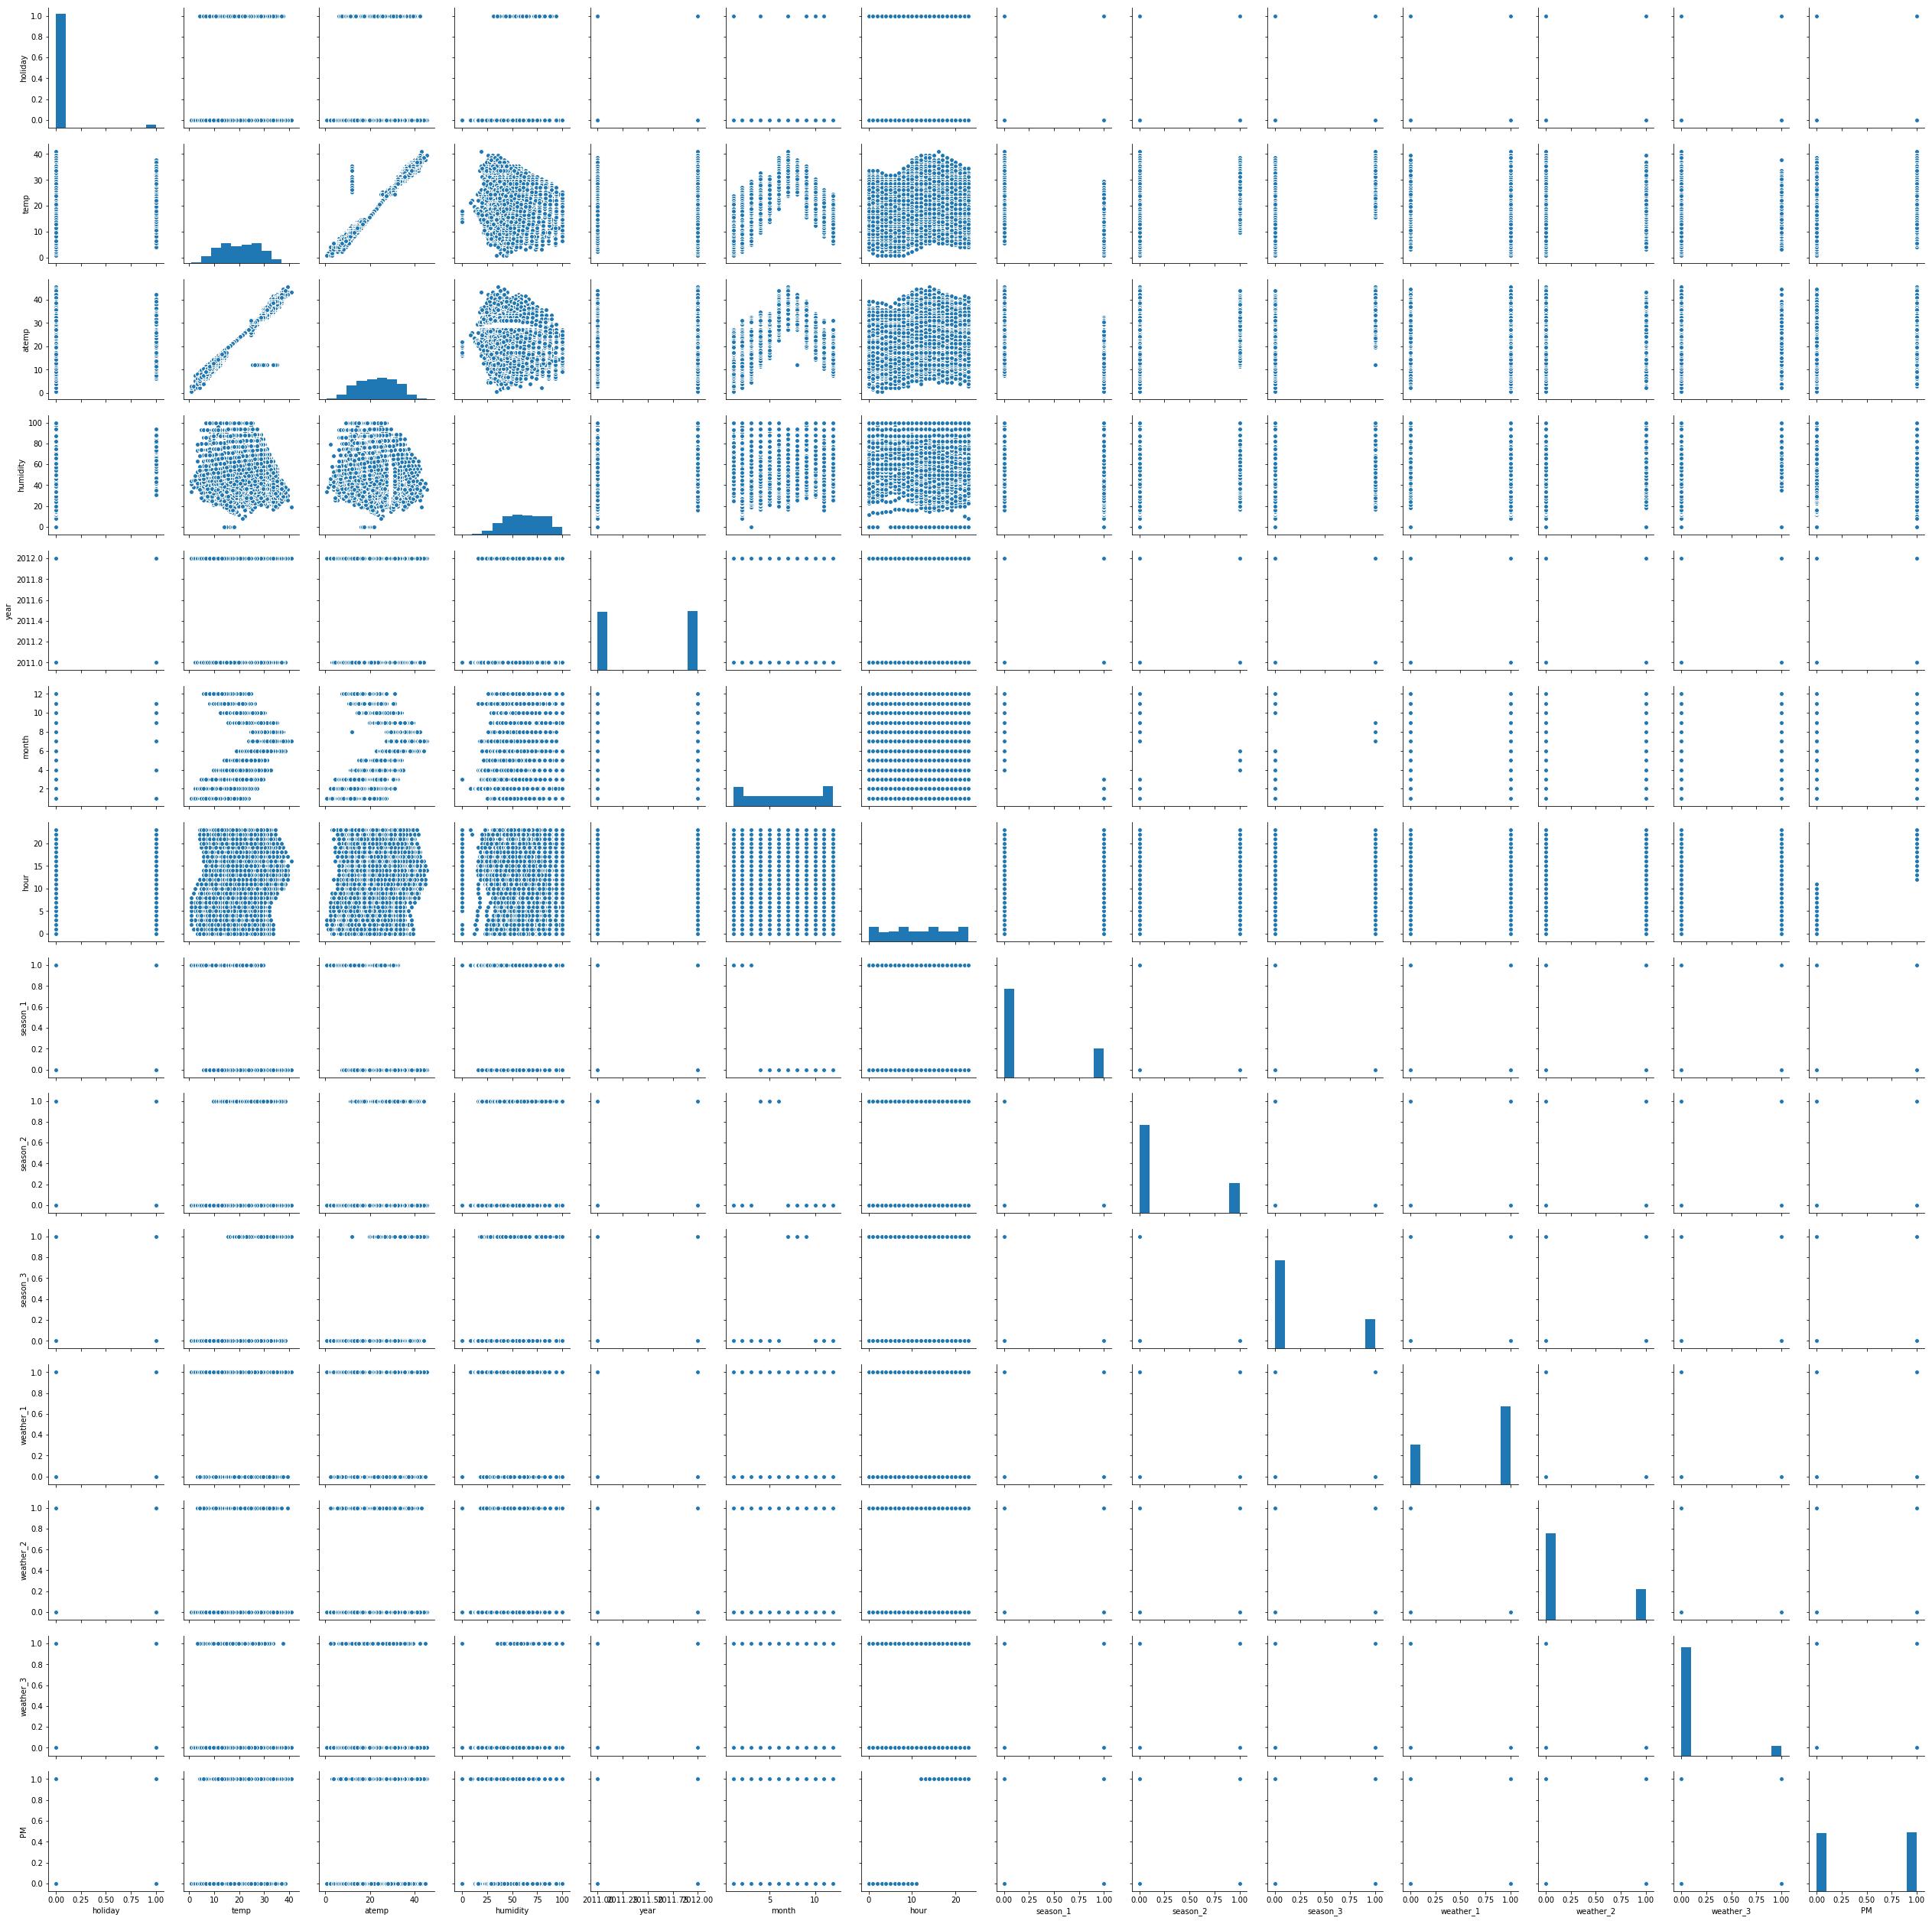

In [56]:
#We will explore relationship between features
sns.pairplot(X_train.loc[:,feature_cols[selector.support_]])  #not visible

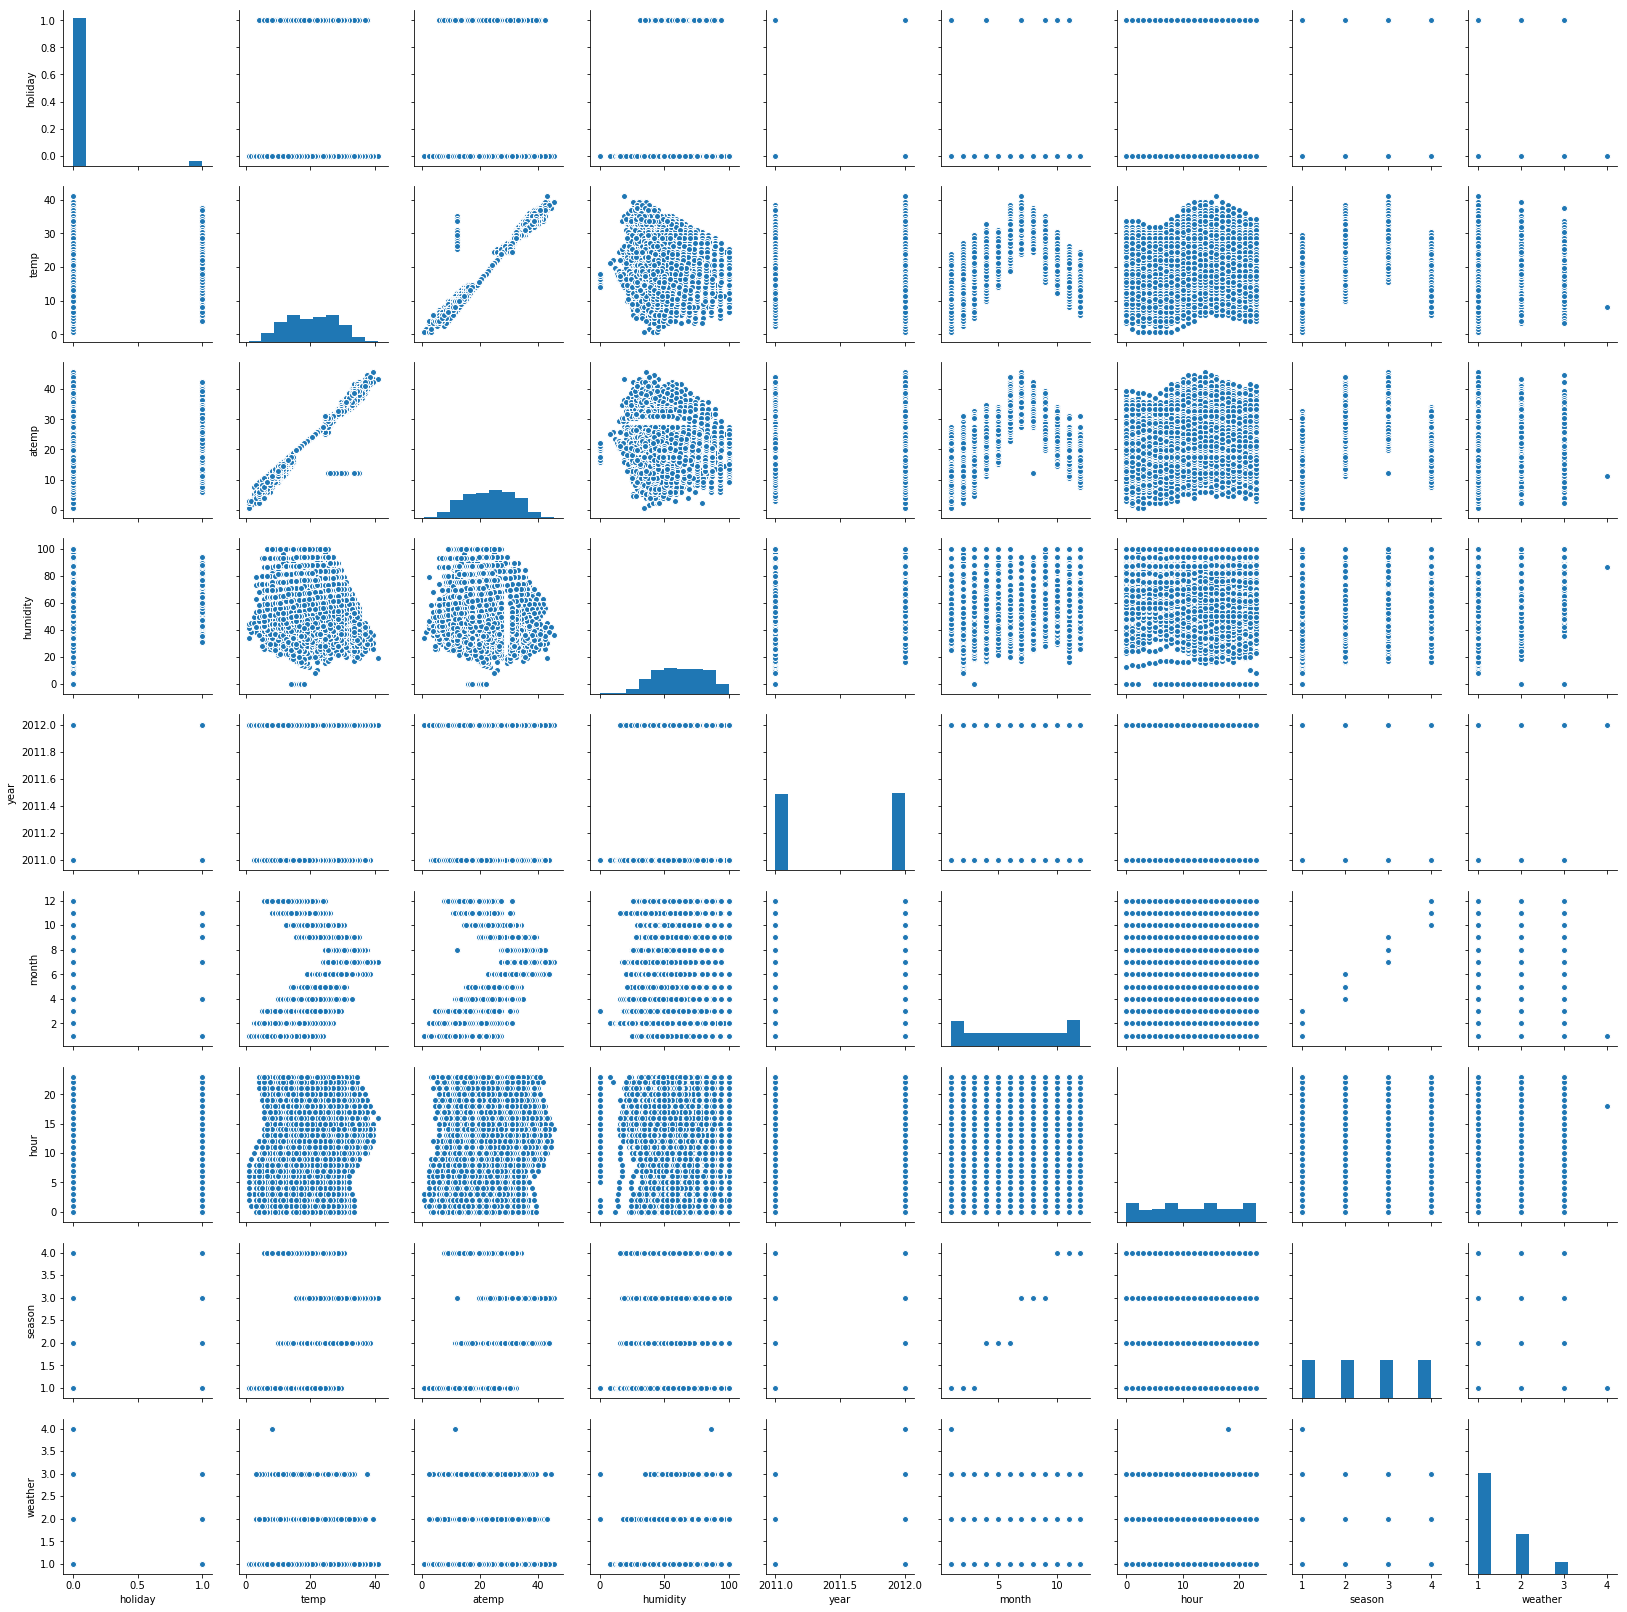

In [57]:
#Let us try to visualize these relationship in original data (before introducing dummies)
model_features = ['holiday', 'temp', 'atemp', 'humidity', 'year', 'month', 'hour',
       'season',  'weather', 'AmPm']
sns.pairplot(bikesharing.loc[:,model_features])

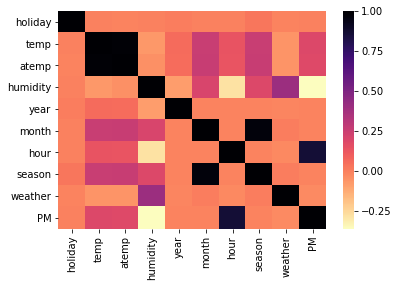

In [58]:
sns.heatmap(pd.concat([bikesharing.loc[:,model_features],X_train.loc[:,'PM']],axis=1).corr(),cmap='magma_r') 
#month & season of-course are highly co-related
#temp & atemp are highly co-related
#weather & humidity are somewhat co-related
#hour & PM of-course are co-related

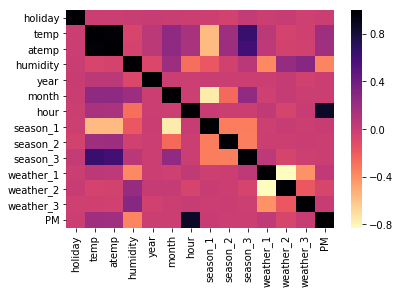

In [59]:
#let us explore this relationship in data with dummy variables
sns.heatmap(X_train.loc[:,feature_cols[selector.support_]].corr(),cmap='magma_r')
#temp, atemp are highly co-related
#hour & PM are highly co-related
# season3 & temperature are also somehow related

In [60]:
#check out of temp & atemp which one should be retained
pd.concat([X_train.loc[:,['temp','atemp']],y_train],axis=1).corr()
# we will retain temp since it has higher co-relation

,temp,atemp,count
temp,1.000000,0.984948,0.394454
atemp,0.984948,1.000000,0.389784
count,0.394454,0.389784,1.000000


In [61]:
#similarly check between hour & PM
pd.concat([X_train.loc[:,['hour','PM']],y_train],axis=1).corr()

,hour,PM,count
hour,1.000000,0.866199,0.400601
PM,0.866199,1.000000,0.402111
count,0.400601,0.402111,1.000000


In [62]:
#Dropping atemp from the important columns
feature_cols3 = feature_cols[selector.support_]
feature_cols3 = feature_cols3[feature_cols3!='atemp']
feature_cols3

Index(['holiday', 'temp', 'humidity', 'year', 'month', 'hour', 'season_1',
       'season_2', 'season_3', 'weather_1', 'weather_2', 'weather_3', 'PM'],
      dtype='object')

In [63]:
#Instead of dropping hour column, we can convert that into dummy variables as hour is actually a categorical variable here
hour_dummies = pd.get_dummies(train.hour, prefix='hour')
hour_dummies.shape[1]   #24 columns
#Drop last columns of the dummy variables as the information is already retained when the other three are zeroes
hour_dummies.drop(hour_dummies.columns[23],axis=1,inplace=True)
hour_dummies.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#Adding dummies to original training Data
train = pd.concat([train,hour_dummies],axis=1)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,week,...,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,2011,1,52,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,2011,1,52,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,2011,1,52,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,2011,1,52,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,2011,1,52,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#Similarly year & month should also be converted into dummy variables
month_dummies = pd.get_dummies(train.month, prefix='month')
month_dummies.shape[1]   #12 columns
year_dummies = pd.get_dummies(train.year, prefix='year')
year_dummies.shape[1]  #2
#Drop last columns of the dummy variables as the information is already retained when the other three are zeroes
month_dummies.drop(month_dummies.columns[11],axis=1,inplace=True)
year_dummies.drop(year_dummies.columns[1],axis=1,inplace=True)

In [66]:
#Adding dummy variables to train set
train = pd.concat([train,month_dummies,year_dummies],axis=1)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,week,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,year_2011
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,2011,1,52,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,2011,1,52,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,2011,1,52,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,2011,1,52,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,2011,1,52,...,0,0,0,0,0,0,0,0,0,1


In [67]:
#removing original variables from training set
train.drop(['month','year','hour'],axis=1,inplace=True)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,week,season_1,season_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,year_2011
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,52,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,52,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,52,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,52,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,52,1,0,...,0,0,0,0,0,0,0,0,0,1


We are not converting week to dummy variable as the test data contains the weeks towards end of month which will not be present in our training data

In [68]:
#extracting labels of dummy variables
lab_hour=re.findall("hour_\d+",str(train.columns))
lab_hour

['hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22']

In [69]:
lab_month=re.findall("month_\d+",str(train.columns))
lab_month

['month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11']

In [70]:
lab_year=re.findall("year_\d+",str(train.columns))
lab_year

['year_2011']

In [71]:
feature_cols3 = np.append(feature_cols3,lab_hour)
feature_cols3 = np.append(feature_cols3,lab_month)
feature_cols3 = np.append(feature_cols3,lab_year)
feature_cols3

array(['holiday', 'temp', 'humidity', 'year', 'month', 'hour', 'season_1',
       'season_2', 'season_3', 'weather_1', 'weather_2', 'weather_3', 'PM',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'year_2011'], dtype=object)

In [72]:
feature_cols3 = np.setdiff1d(feature_cols3,['month','year','hour'])

In [73]:
len(feature_cols3)   #45

45

In [74]:
rmse2 = pd.DataFrame({'N_features':np.arange(1,46)})
rmse2['RMSE']=0.0
rmse2.head()

,N_features,RMSE
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [75]:
#Measuring validation set error
for i in rmse2.N_features:
    print(i)
    rmse2.RMSE[i-1]=train_test_rmse(i,train,feature_cols3)

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


6


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


7


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


9


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


11


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


12


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


13


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


14


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


15


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


16


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


17


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


18


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


19


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


20


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


21


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


22


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


23


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


24


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


25


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


26


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


28


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


29


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


30


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


31


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


32


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


33


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


34


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


35


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


36
37


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


38


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


39


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


40


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


41


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


42
43


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


44


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


45


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [76]:
rmse2

,N_features,RMSE
0,1,1.796343e+02
1,2,1.791848e+02
2,3,1.791942e+02
3,4,1.791892e+02
4,5,1.751469e+02
5,6,1.746264e+02
6,7,1.745648e+02
7,8,1.744992e+02
8,9,1.740944e+02
9,10,1.741022e+02


In [77]:
rmse2[rmse2.RMSE==min(rmse2.RMSE)]   #14 features

,N_features,RMSE
13,14,171.994754


##### Decision Tree

Will try Decision Tree next to see if that gives better result

In [78]:
from sklearn import tree

In [79]:
def train_test_DT(train,feature_cols,criterion,max_depth,min_samples_split):
    X = train[feature_cols]
    y = train['count']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    my_tree_one = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=min_samples_split)
    my_tree_one = my_tree_one.fit(X_train, y_train)
    y_pred = my_tree_one.predict(X_test)
    return(np.sqrt(mean_squared_error(y_test, y_pred)))

In [80]:
rmse_DT = pd.DataFrame({'criterion':['entropy','entropy','entropy','entropy','entropy','entropy','entropy','entropy','gini','gini','gini','gini','gini','gini','gini','gini'],
                    'max_depth':[7,7,8,8,9,9,10,10,7,7,8,8,9,9,10,10],
                    'min_samples_split':[50,100,50,100,50,100,50,100,50,100,50,100,50,100,50,100]})

In [81]:
rmse_DT['RMSE']=0.0
rmse_DT

,criterion,max_depth,min_samples_split,RMSE
0,entropy,7,50,0.0
1,entropy,7,100,0.0
2,entropy,8,50,0.0
3,entropy,8,100,0.0
4,entropy,9,50,0.0
5,entropy,9,100,0.0
6,entropy,10,50,0.0
7,entropy,10,100,0.0
8,gini,7,50,0.0
9,gini,7,100,0.0


In [82]:
for i in rmse_DT.index:
    rmse_DT.RMSE[i]=train_test_DT(train=train,feature_cols=feature_cols3,criterion=rmse_DT.criterion[i],max_depth=rmse_DT.max_depth[i],min_samples_split=rmse_DT.min_samples_split[i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
rmse_DT

,criterion,max_depth,min_samples_split,RMSE
0,entropy,7,50,164.795121
1,entropy,7,100,164.241638
2,entropy,8,50,159.667070
3,entropy,8,100,164.480275
4,entropy,9,50,160.297843
5,entropy,9,100,164.530489
6,entropy,10,50,158.956296
7,entropy,10,100,164.512754
8,gini,7,50,165.816411
9,gini,7,100,165.819257


In [84]:
rmse_DT[rmse_DT.RMSE==min(rmse_DT.RMSE)]  #147.99

,criterion,max_depth,min_samples_split,RMSE
10,gini,8,50,147.99449


##### Random Forest

Will try with Random Forest now

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
def train_test_RF(train,feature_cols,criterion,max_depth,min_samples_split,ntree,mtries):
    X = train[feature_cols]
    y = train['count']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    my_tree_one = RandomForestClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=min_samples_split,
                                             n_estimators = ntree,max_features=mtries, random_state=12)
    my_tree_one = my_tree_one.fit(X_train, y_train)
    y_pred = my_tree_one.predict(X_test)
    print ("Features sorted by their score")
    print (sorted(zip(map(lambda x: round(x, 4), my_tree_one.feature_importances_), feature_cols3), reverse=True))
    return(np.sqrt(mean_squared_error(y_test, y_pred)))

In [87]:
train[feature_cols3].columns

Index(['PM', 'holiday', 'hour_0', 'hour_1', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_2', 'hour_20', 'hour_21', 'hour_22', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'humidity',
       'month_1', 'month_10', 'month_11', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_1',
       'season_2', 'season_3', 'temp', 'weather_1', 'weather_2', 'weather_3',
       'year_2011'],
      dtype='object')

In [88]:
#feature_cols4

In [89]:
rmse_RF = train_test_RF(train=train,feature_cols=feature_cols3,criterion='gini',max_depth=10,min_samples_split=50,ntree=500,mtries=8)
rmse_RF

Features sorted by their score
[(0.1162, 'temp'), (0.1053, 'humidity'), (0.087900000000000006, 'hour_4'), (0.051900000000000002, 'hour_3'), (0.039800000000000002, 'season_1'), (0.038899999999999997, 'PM'), (0.036999999999999998, 'year_2011'), (0.031, 'hour_2'), (0.024199999999999999, 'hour_5'), (0.022200000000000001, 'weather_3'), (0.019199999999999998, 'month_4'), (0.019, 'weather_1'), (0.0189, 'weather_2'), (0.018800000000000001, 'hour_1'), (0.0184, 'holiday'), (0.018200000000000001, 'month_8'), (0.017999999999999999, 'month_11'), (0.017600000000000001, 'month_2'), (0.017000000000000001, 'month_10'), (0.016899999999999998, 'month_3'), (0.0166, 'season_3'), (0.015900000000000001, 'month_6'), (0.0154, 'month_9'), (0.0149, 'month_5'), (0.0147, 'season_2'), (0.0144, 'month_1'), (0.0141, 'month_7'), (0.013100000000000001, 'hour_0'), (0.0115, 'hour_9'), (0.0106, 'hour_22'), (0.0097999999999999997, 'hour_18'), (0.0094999999999999998, 'hour_10'), (0.0094000000000000004, 'hour_8'), (0.0089999

131.0510960920258

In [90]:
rmse_RF2 = train_test_RF(train=train,feature_cols=feature_cols3,criterion='gini',max_depth=14,min_samples_split=50,ntree=750,mtries=8)
rmse_RF2

Features sorted by their score
[(0.1241, 'temp'), (0.1163, 'humidity'), (0.059900000000000002, 'hour_4'), (0.038100000000000002, 'year_2011'), (0.036799999999999999, 'hour_3'), (0.032000000000000001, 'season_1'), (0.025700000000000001, 'PM'), (0.023699999999999999, 'weather_3'), (0.023599999999999999, 'hour_2'), (0.022800000000000001, 'weather_2'), (0.021499999999999998, 'weather_1'), (0.020799999999999999, 'holiday'), (0.020400000000000001, 'month_4'), (0.019699999999999999, 'hour_5'), (0.0195, 'month_11'), (0.018700000000000001, 'month_10'), (0.018599999999999998, 'month_8'), (0.017600000000000001, 'month_6'), (0.017500000000000002, 'month_3'), (0.017399999999999999, 'month_5'), (0.017299999999999999, 'month_9'), (0.0172, 'season_2'), (0.016899999999999998, 'season_3'), (0.016899999999999998, 'hour_1'), (0.016, 'month_2'), (0.0152, 'month_7'), (0.014200000000000001, 'month_1'), (0.012800000000000001, 'hour_0'), (0.012500000000000001, 'hour_22'), (0.0115, 'hour_9'), (0.011299999999999

122.1233582145601

Will restrict the number of variables to top 25 most important variables from RF & re-run RF model to see if that brings any improvement

In [91]:
feature_cols4 = np.array(['temp','humidity','hour_4','year_2011','hour_3','season_1','PM','weather_3','hour_2','weather_2',
                         'weather_1','holiday','month_4','hour_5','month_11','month_10','month_8','month_6','month_3','month_5',
                         'month_9','season_2','season_3','hour_1','month_2'])

In [92]:
#rmse_RF3 = train_test_RF(train=train,feature_cols=feature_cols4,criterion='gini',max_depth=10,min_samples_split=50,ntree=750,mtries=6)
#rmse_RF3 #Results are not better

In [93]:
#Modilfy test set for our prediction
test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_1', 'season_2', 'season_3', 'weather_1', 'weather_2',
       'weather_3', 'year', 'month', 'week', 'hour', 'PM'],
      dtype='object')

In [94]:
test.drop(['atemp'],axis=1,inplace=True)

In [95]:
hour_dummies = pd.get_dummies(test.hour, prefix='hour')
hour_dummies.shape[1]   #24 columns
hour_dummies.drop(hour_dummies.columns[23],axis=1,inplace=True)

In [96]:
month_dummies = pd.get_dummies(test.month, prefix='month')
month_dummies.shape[1]   #12 columns
year_dummies = pd.get_dummies(test.year, prefix='year')
year_dummies.shape[1]  #2
month_dummies.drop(month_dummies.columns[11],axis=1,inplace=True)
year_dummies.drop(year_dummies.columns[1],axis=1,inplace=True)

In [97]:
test = pd.concat([test,hour_dummies,month_dummies,year_dummies],axis=1)
test.drop(['hour','month','year'],axis=1,inplace=True)
test.head()

,holiday,workingday,temp,humidity,windspeed,season_1,season_2,season_3,weather_1,weather_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,year_2011
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-20 00:00:00,0,1,10.66,56,26.0027,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-20 01:00:00,0,1,10.66,56,0.0000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-20 02:00:00,0,1,10.66,56,0.0000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-20 03:00:00,0,1,10.66,56,11.0014,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-20 04:00:00,0,1,10.66,56,11.0014,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [190]:
#Generating prediction result on Kaggle's test set
X_train = train[feature_cols3]
y_train = train['count']
X_test = test[feature_cols3]
my_tree_one = RandomForestClassifier(criterion='gini', max_depth=14,min_samples_split=50,n_estimators=750,max_features=8, random_state=12)
my_tree_one = my_tree_one.fit(X_train, y_train)
y_pred = my_tree_one.predict(X_test)

In [99]:
#Converting negative values to 0
for i in np.arange(0,len(y_pred)):
    if y_pred[i]<0:
        y_pred[i]=0

In [100]:
#Rounding up count prediction values
y_pred = y_pred.astype(int).round()

In [101]:
#so as to maintain order in final submission file
submission2 = pd.DataFrame(list(zip(test.index,y_pred)))
submission2.rename(columns={0:'datetime',1:'count'},inplace=True)
submission2.head()

,datetime,count
0,2011-01-20 00:00:00,17
1,2011-01-20 01:00:00,5
2,2011-01-20 02:00:00,2
3,2011-01-20 03:00:00,1
4,2011-01-20 04:00:00,1


In [102]:
#submission2.to_csv('submission.csv',index=False)  #kaggle public score 0.88393 (Rank would have been 2709/3252)

#### Linear Regression with Gradient Descent

In [229]:
import tensorflow as tf

In [230]:
tf.reset_default_graph()

In [231]:
X_train.head()

,PM,holiday,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,...,month_7,month_8,month_9,season_1,season_2,season_3,weather_1,weather_2,weather_3,year_2011
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2011-01-01 01:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2011-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2011-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2011-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [192]:
y_train = np.reshape(y_train,(y_train.shape[0],1))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [167]:
X_train.columns[X_train.dtypes==float]

Index(['temp'], dtype='object')

In [193]:
X_train.columns

Index(['PM', 'holiday', 'hour_0', 'hour_1', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_2', 'hour_20', 'hour_21', 'hour_22', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'humidity',
       'month_1', 'month_10', 'month_11', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_1',
       'season_2', 'season_3', 'temp', 'weather_1', 'weather_2', 'weather_3',
       'year_2011'],
      dtype='object')

In [194]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std = scaler.fit_transform(X_train[['humidity','temp']])

In [195]:
X_train_std[:,0]

array([ 0.99321305,  0.94124921,  0.94124921, ..., -0.04606385,
       -0.04606385,  0.21375537])

In [196]:
X_train_std = pd.DataFrame({'humidity':X_train_std[:,0],'temp':X_train_std[:,1]})

In [197]:
X_train_std.head()

,humidity,temp
0,0.993213,-1.333661
1,0.941249,-1.438907
2,0.941249,-1.438907
3,0.681430,-1.333661
4,0.681430,-1.333661


In [198]:
X_train.drop(['humidity','temp'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [205]:
X_train_std.set_index(X_train.index,inplace=True)

In [207]:
X_train_std = pd.concat([X_train_std,X_train],axis=1)

In [232]:
#Input features placeholder
x = tf.placeholder(shape=[None,X_train_std.shape[1]],dtype=tf.float32, name='x-input')

#Actual Count placeholder
y_ = tf.placeholder(shape=[None,y_train.shape[1]],dtype=tf.float32, name='y-input')

In [233]:
W = tf.Variable(tf.zeros(shape=[X_train_std.shape[1],1]), name="Weights")
b = tf.Variable(tf.zeros(shape=[1]),name="Bias")

In [234]:
y = tf.add(tf.matmul(x,W),b,name='output')

In [235]:
loss = tf.reduce_mean(tf.square(y-y_),name='Loss')

In [236]:
learn_rate = np.array([0.001,0.003,0.01,0.03,0.1,0.3,0.4,0.5])

In [237]:
learning_rate = tf.placeholder(tf.float32, shape=[])

In [238]:
train_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [239]:
error = pd.DataFrame({'LR':learn_rate,'Loss':100000})
error.head()

,LR,Loss
0,0.001,100000
1,0.003,100000
2,0.010,100000
3,0.030,100000
4,0.100,100000


Logging Information for Tensorboard & saving the model

In [240]:
#Define a summary scalar object to capture loss
training_loss = tf.summary.scalar('train_loss',loss)

#Create saver to save the graph
saver = tf.train.Saver()

In [241]:
#Working Directory
import os
cwd = os.getcwd()

In [242]:
#Lets start graph Execution
with tf.Session() as sess:
    
    for rate in learn_rate: 
        
        print ('Learning Rate: ',rate)
        
        # variables need to be initialized before we can use them
        sess.run(tf.global_variables_initializer())
        
        #Define the logs directory to store the logs, you can change the value
        log_dir = cwd + '/bikesharing/model/LR'+ str(rate)
        
        #Initialize Writer for Logging
        writer = tf.summary.FileWriter(log_dir, graph=tf.get_default_graph())
    
        #how many times data need to be shown to model
        training_epochs = 1000  
    
        for epoch in range(training_epochs):
        
            #Calculate train_op and loss
            _, train_loss,loss_log = sess.run([train_op,  #Gradient Descent node
                                      loss,      #loss node for printing
                                      training_loss #stored in log file
                                     ], 
                                 feed_dict={x:X_train_std, #Data for Input feature
                                            y_:y_train,
                                           learning_rate:rate}) #Actual price data
             
            #Write the logs
            writer.add_summary(loss_log, epoch)    
                
            #Print the loss after every 200 iterations
            if epoch % 200 == 0:
                print ('Training loss at step: ', epoch, ' is ', train_loss)
                
            #Record training loss
            if epoch == 999:
                error.Loss[error.LR==rate] = train_loss
                
        #Saving the graph
        saver.save(sess, log_dir + '/' + 'bike.ckpt')

Learning Rate:  0.001
Training loss at step:  0  is  69510.6
Training loss at step:  200  is  32288.9
Training loss at step:  400  is  25430.9
Training loss at step:  600  is  23430.5
Training loss at step:  800  is  22368.8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Learning Rate:  0.003
Training loss at step:  0  is  69510.6
Training loss at step:  200  is  23424.8
Training loss at step:  400  is  20914.3
Training loss at step:  600  is  19360.3
Training loss at step:  800  is  18209.6
Learning Rate:  0.01
Training loss at step:  0  is  69510.6
Training loss at step:  200  is  18938.4
Training loss at step:  400  is  16153.3
Training loss at step:  600  is  14569.5
Training loss at step:  800  is  13513.4
Learning Rate:  0.03
Training loss at step:  0  is  69510.6
Training loss at step:  200  is  14565.7
Training loss at step:  400  is  12233.7
Training loss at step:  600  is  11348.6
Training loss at step:  800  is  10979.5
Learning Rate:  0.1
Training loss at step:  0  is  69510.6
Training loss at step:  200  is  11187.2
Training loss at step:  400  is  10667.0
Training loss at step:  600  is  10522.9
Training loss at step:  800  is  10423.8
Learning Rate:  0.3
Training loss at step:  0  is  69510.6
Training loss at step:  200  is  10522.6
Trai

In [243]:
error[error.Loss==min(error.Loss)]

,LR,Loss
6,0.4,10088.069336


In [244]:
#We can visualiza the model learning rate using tensorboard; going ahead with 0.4 LR
#Load saved model

#Directory where graph and data is stored
log_dir = cwd + '/bikesharing/model/LR'+'0.4'
model_name = 'bike.ckpt'

#Start the session
sess = tf.Session()

#Load Graph
new_saver = tf.train.import_meta_graph(log_dir + '/' + model_name + '.meta')

#Load Weights and Bias
new_saver.restore(sess, log_dir + '/' + model_name)

INFO:tensorflow:Restoring parameters from F:\Study\UpX\Module 2 - Machine Learning\Python Practice/bikesharing/model/LR0.4/bike.ckpt


In [245]:
#Get access to current graph
graph = tf.get_default_graph()

#Get input tensor
x = graph.get_tensor_by_name('x-input:0')

#Get output tensor
y = graph.get_tensor_by_name('output:0')

In [252]:
#prepare test data
X_test_std = scaler.fit_transform(X_test[['humidity','temp']])

In [253]:
X_test_std = pd.DataFrame({'humidity':X_test_std[:,0],'temp':X_test_std[:,1]})

In [254]:
X_test.drop(['humidity','temp'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
X_test_std.set_index(X_test.index,inplace=True)

In [256]:
X_test_std = pd.concat([X_test_std,X_test],axis=1)

In [257]:
#Prediction
predicted_nums = sess.run([y], feed_dict={x:X_test_std})

print(predicted_nums[0])

[[ -70.57543945]
 [ -87.42196655]
 [ -98.46011353]
 ..., 
 [ 152.95709229]
 [ 120.16428375]
 [  86.91175079]]


In [273]:
len(predicted_nums[0])

6493

In [268]:
X_test.shape

(6493, 43)

In [277]:
#Converting negative values to 0
for i in np.arange(0,len(predicted_nums[0])):
    if predicted_nums[0][i]<0:
        predicted_nums[0][i]=0

In [ ]:
#Rounding up count prediction values
predicted_nums = predicted_nums.astype(int).round()

In [278]:
predicted_nums[0][0]

array([ 0.], dtype=float32)

In [285]:
y_pred=[int(i) for i in predicted_nums[0]]

In [287]:
y_pred[1:10]

[0, 0, 0, 0, 0, 0, 92, 235, 81]

In [288]:
submission3 = pd.DataFrame(list(zip(test.index,y_pred)))
submission3.rename(columns={0:'datetime',1:'count'},inplace=True)
submission3.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [289]:
#submission3.to_csv('submission.csv',index=False)  #kaggle public score 1.13725 (Rank would have been 2846/3252)
#So it seems LR would not be the right solution to the problem here. Next I would try to fit a neural network.